# Projeto 1
## perfil dos aposentados

**o que fazer:**
1. Entender o Dataset	
2. Maniular os dados
3. Aplicar o ferramental (var quat/ var quali)*
4. Concluir (escrever o Relatorio)*
* Se precisar pesquisar fatos que expliquem o comportamento (contexto)

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dados = pd.read_csv('pes2013R.csv', sep=',')

In [2]:
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,1,2013,11,15,3,1,4,25,8,1971,...,1.0,350.0,3.0,2,2.0,NaN,NaN,2.0,350.0,20150428
1,2,2013,11,15,4,1,4,20,1,1949,...,2.0,339.0,2.0,1,2.0,NaN,NaN,2.0,339.0,20150428
2,3,2013,11,15,4,2,4,24,6,2000,...,2.0,339.0,2.0,2,2.0,NaN,NaN,2.0,339.0,20150428
3,4,2013,11,15,5,1,2,16,5,1990,...,3.0,266.0,2.0,1,1.0,2.0,2.0,1.0,266.0,20150428
4,5,2013,11,15,5,2,4,18,7,1994,...,3.0,266.0,2.0,5,2.0,NaN,NaN,2.0,266.0,20150428


In [3]:
dados.shape

(362555, 331)

In [77]:
ct11= pd.crosstab(b.V4728,b.V0302)
ct11

V0302,Masculino,Feminino
V4728,,
urbana,11957,12196
urbana1,194,166
urbana2,75,61
rural,31,41
rural1,254,304
rural2,7,3
rural3,10,11
rural4,2033,2138


In [76]:
dados.V0302.value_counts(True)*100

Feminino     51.427508
Masculino    48.572492
Name: V0302, dtype: float64

In [74]:
dados.V0302 = dados.V0302.astype('category')
dados.V0302.cat.categories = ('Masculino', 'Feminino')

In [4]:
b = dados[(dados.V9122==2)& (dados.V4720<9999999999)& (~dados.V6007.isnull())& (~dados.V06112.isnull())]

In [5]:
b = b.copy()
# Vamos fazer o índice recomeçar em 1 porque isso facilita a troca de dados com o numpy
b.index = pd.Series(range(len(b)))
b.shape

(29481, 331)

In [6]:
b.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,35,2013,11,23,3,1,4,16,4,1949,...,1.0,1178.0,4.0,2,1.0,2.0,2.0,1.0,1178.0,20150428
1,88,2013,11,31,6,1,2,24,3,1945,...,3.0,559.0,3.0,2,2.0,NaN,NaN,2.0,559.0,20150428
2,172,2013,11,40,15,1,2,7,11,1967,...,2.0,689.0,4.0,2,2.0,NaN,NaN,2.0,689.0,20150428
3,188,2013,11,58,4,2,4,28,12,1954,...,2.0,678.0,3.0,2,2.0,NaN,NaN,2.0,678.0,20150428
4,336,2013,11,82,4,2,4,18,1,1956,...,5.0,335.0,2.0,2,1.0,1.0,1.0,1.0,489.0,20150428


In [7]:
b.V6007 = b.V6007.astype('category')
b.V6007.cat.categories = ('Elementar', 'Médio 1º ciclo', 'Médio 2º ciclo', 'Regular do ensino fundamental ou do 1º grau', 'Regular do ensino médio ou do 2º grau', 'supletivo do ensino fundamental', 'supletivo de ensino médio', 'Superior de graduação', 'Mestrado ou doutorado', 'Alfabetização de jovens e adultos','Creche', 'Classe de alfabetização', 'Maternal')

In [8]:
b.V6007.value_counts()

Elementar                                      13759
Superior de graduação                           3722
Regular do ensino fundamental ou do 1º grau     3052
Regular do ensino médio ou do 2º grau           2748
Médio 1º ciclo                                  2582
Médio 2º ciclo                                  2044
Classe de alfabetização                          375
supletivo de ensino médio                        356
supletivo do ensino fundamental                  355
Alfabetização de jovens e adultos                251
Mestrado ou doutorado                            223
Maternal                                           7
Creche                                             7
Name: V6007, dtype: int64

In [9]:
b.V0302 = b.V0302.astype('category')
b.V0302.cat.categories = ('Masculino', 'Feminino')

In [10]:
b.V0302.value_counts() 

Feminino     14920
Masculino    14561
Name: V0302, dtype: int64

In [11]:
sexo_ocorrencia = b.V0302.value_counts(True)*100 
sexo_ocorrencia.round(decimals=2)  

Feminino     50.61
Masculino    49.39
Name: V0302, dtype: float64

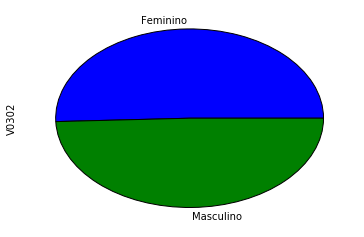

In [12]:
sexo_ocorrencia .plot(kind="pie")

In [13]:
b.V8005.describe()

count    29481.000000
mean        66.381602
std         10.155950
min         12.000000
25%         60.000000
50%         66.000000
75%         73.000000
max        109.000000
Name: V8005, dtype: float64

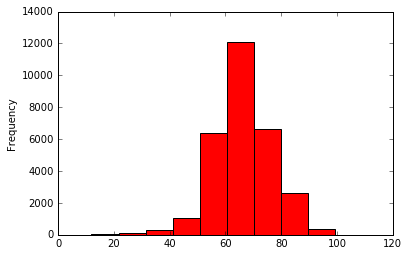

In [14]:
b.V8005.plot(kind='hist', color=('red'), legend=False)

In [15]:
faixas = (20,30,40,50,60,70,80,90,100,110)
new_index=[20,30,40,50,60,70,80,90,100]

In [16]:
faixa_idade=b.V8005.value_counts(bins=faixas)
Idade=faixa_idade.reindex(new_index)
Idade

20        70
30       252
40      1116
50      6394
60     12070
70      7070
80      2229
90       257
100       11
Name: V8005, dtype: int64

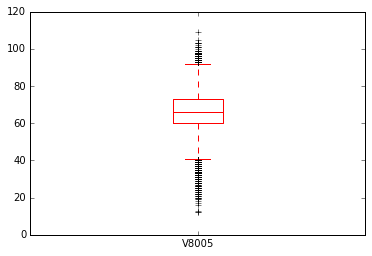

In [17]:
b.V8005.plot(kind='box', color=('red'))

In [18]:
dados.V0404.value_counts()

8    174042
2    155218
4     30130
0      1688
6      1471
9         6
Name: V0404, dtype: int64

In [19]:
dados.V0404 = dados.V0404.astype('category')
dados.V0404.cat.categories = ('Indigena', 'Branca', 'Preta', 'Amarela', 'Parda','sem declaração')

In [20]:
etnia_ocorrencia_pop = dados.V0404.value_counts(True)*100 
etnia_ocorrencia_pop.round(decimals=2) 

Parda             48.00
Branca            42.81
Preta              8.31
Indigena           0.47
Amarela            0.41
sem declaração     0.00
Name: V0404, dtype: float64

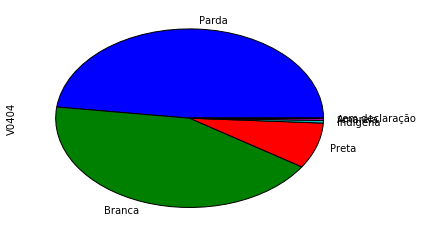

In [21]:
etnia_ocorrencia_pop .plot(kind="pie")

In [22]:
b.V0404.value_counts()

2    16314
8    10603
4     2277
6      200
0       87
Name: V0404, dtype: int64

In [23]:
b.V0404 = b.V0404.astype('category')
b.V0404.cat.categories = ('Indigena', 'Branca', 'Preta', 'Amarela', 'Parda')

In [24]:
b.V0404.value_counts()

Branca      16314
Parda       10603
Preta        2277
Amarela       200
Indigena       87
Name: V0404, dtype: int64

In [25]:
etnia_ocorrencia = b.V0404.value_counts(True)*100 
etnia_ocorrencia.round(decimals=2) 

Branca      55.34
Parda       35.97
Preta        7.72
Amarela      0.68
Indigena     0.30
Name: V0404, dtype: float64

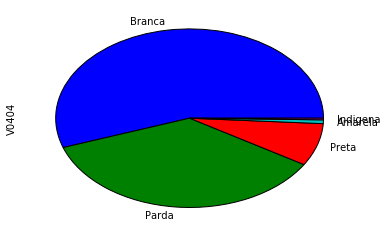

In [26]:
etnia_ocorrencia .plot(kind="pie")

In [27]:
ct10 = pd.crosstab(b.V6007, b.V0302)
ct10

V0302,Masculino,Feminino
V6007,,
Elementar,6877,6882
Médio 1º ciclo,1376,1206
Médio 2º ciclo,981,1063
Regular do ensino fundamental ou do 1º grau,1682,1370
Regular do ensino médio ou do 2º grau,1386,1362
supletivo do ensino fundamental,138,217
supletivo de ensino médio,181,175
Superior de graduação,1556,2166
Mestrado ou doutorado,108,115


In [28]:
ct1 = pd.crosstab(b.V0404, b.V0302)
ct1

V0302,Masculino,Feminino
V0404,,
Indigena,36,51
Branca,7941,8373
Preta,1202,1075
Amarela,89,111
Parda,5293,5310


In [29]:
b.V4728.value_counts()

1    24153
8     4171
5      558
2      360
3      136
4       72
7       21
6       10
Name: V4728, dtype: int64

In [30]:
b.V4728 = b.V4728.astype('category')
b.V4728.cat.categories = ('urbana', 'urbana1','urbana2','rural','rural1','rural2','rural3','rural4')
b.V4728.value_counts()

urbana     24153
rural4      4171
rural1       558
urbana1      360
urbana2      136
rural         72
rural3        21
rural2        10
Name: V4728, dtype: int64

In [31]:
moradia_ocorrencia = b.V4728.value_counts(True)*100
moradia_ocorrencia.round(decimals=2) 


urbana     81.93
rural4     14.15
rural1      1.89
urbana1     1.22
urbana2     0.46
rural       0.24
rural3      0.07
rural2      0.03
Name: V4728, dtype: float64

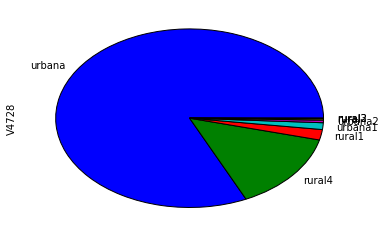

In [32]:
moradia_ocorrencia.plot(kind="pie")

In [33]:
b.V06112 = b.V06112 .astype('category')
b.V06112 .cat.categories = ('sim', 'não')
b.V06112 .value_counts()

sim    18481
não    11000
Name: V06112, dtype: int64

In [34]:
celular_ocorrencia = b.V06112.value_counts(True)*100 
celular_ocorrencia.round(decimals=2) 

sim    62.69
não    37.31
Name: V06112, dtype: float64

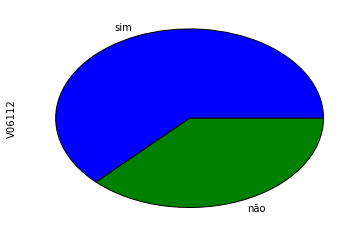

In [35]:
celular_ocorrencia .plot(kind="pie")

In [36]:
ct2 = pd.crosstab(b.V4728,b.V06112)
ct2

V06112,sim,não
V4728,,
urbana,16039,8114
urbana1,237,123
urbana2,93,43
rural,46,26
rural1,204,354
rural2,5,5
rural3,13,8
rural4,1844,2327


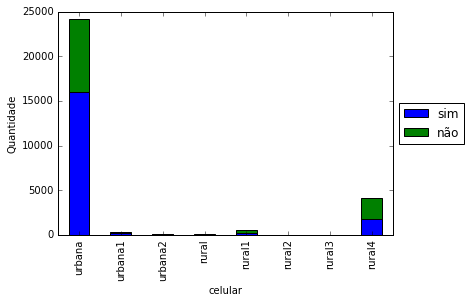

In [37]:
ct2.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('celular')
plt.ylabel('Quantidade')

In [38]:
ct3 = pd.crosstab(b.V4728,b.V0404)
ct3

V0404,Indigena,Branca,Preta,Amarela,Parda
V4728,,,,,
urbana,72,13699,1972,182,8228
urbana1,1,223,24,0,112
urbana2,0,69,17,1,49
rural,1,29,10,0,32
rural1,1,154,56,3,344
rural2,0,2,2,0,6
rural3,0,4,1,1,15
rural4,12,2134,195,13,1817


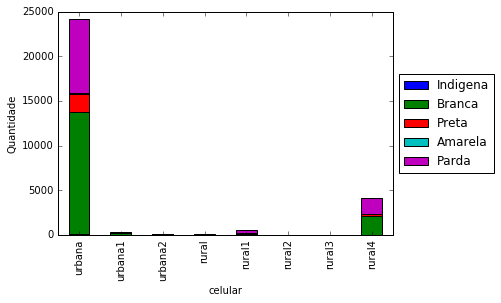

In [39]:
ct3.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('celular')
plt.ylabel('Quantidade')

In [40]:
b.V9891.value_counts()

2.0    3440
1.0    2113
3.0    1338
4.0     662
5.0     434
6.0      89
7.0      66
Name: V9891, dtype: int64

In [81]:
b.V9891 = b.V9891 .astype('category')
b.V9891 .cat.categories = ('Até 9 anos', '10 a 14 anos', '15 a 17 anos', '18 a 19 anos', '20 a 24 anos', '25 a 29 anos', '30 ou mais')
idade_trabalho=b.V9891 .value_counts(True)*100
idade_trabalho

10 a 14 anos    42.250061
Até 9 anos      25.951855
15 a 17 anos    16.433309
18 a 19 anos     8.130680
20 a 24 anos     5.330386
25 a 29 anos     1.093098
30 ou mais       0.810612
Name: V9891, dtype: float64

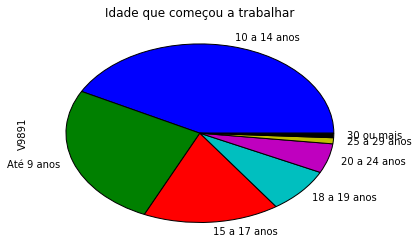

In [84]:
idade_trabalho.plot(kind="pie",title="Idade que começou a trabalhar")

In [42]:
salarios = b.V4720
salarios.describe()

count     29481.000000
mean       1988.890608
std        3214.672797
min         480.000000
25%         678.000000
50%        1050.000000
75%        2000.000000
max      133500.000000
Name: V4720, dtype: float64

In [43]:
salario_log2=np.log2(salarios)
salario_log2.describe()

count    29481.000000
mean        10.350871
std          1.119937
min          8.906891
25%          9.405141
50%         10.036174
75%         10.965784
max         17.026480
Name: V4720, dtype: float64

In [44]:
faixas1 = ( 8.906891,9.16,9.32,9.48,9.64,9.8,9.96,10.120000000000001,10.280000000000001,10.440000000000001,10.600000000000001,10.760000000000002,10.920000000000002,11.080000000000002,11.240000000000002,11.400000000000002,11.560000000000002,11.720000000000002,11.880000000000003,12.040000000000003,12.200000000000003,12.360000000000003,12.520000000000003,12.680000000000003,12.840000000000003,13.000000000000004,13.160000000000004,13.320000000000004,13.480000000000004,13.640000000000004,13.800000000000004,13.960000000000004,14.120000000000005,14.280000000000005,14.440000000000005,14.600000000000005,14.760000000000005,14.920000000000005,15.080000000000005,15.240000000000006,15.400000000000006,15.560000000000006,15.720000000000006,15.880000000000006,16.040000000000006,16.200000000000006,16.360000000000007,16.520000000000007,16.680000000000007,16.840000000000007,17.037)
new_index1=[ 8.906891,9.16,9.32,9.48,9.64,9.8,9.96,10.120000000000001,10.280000000000001,10.440000000000001,10.600000000000001,10.760000000000002,10.920000000000002,11.080000000000002,11.240000000000002,11.400000000000002,11.560000000000002,11.720000000000002,11.880000000000003,12.040000000000003,12.200000000000003,12.360000000000003,12.520000000000003,12.680000000000003,12.840000000000003,13.000000000000004,13.160000000000004,13.320000000000004,13.480000000000004,13.640000000000004,13.800000000000004,13.960000000000004,14.120000000000005,14.280000000000005,14.440000000000005,14.600000000000005,14.760000000000005,14.920000000000005,15.080000000000005,15.240000000000006,15.400000000000006,15.560000000000006,15.720000000000006,15.880000000000006,16.040000000000006,16.200000000000006,16.360000000000007,16.520000000000007,16.680000000000007,16.840000000000007,17.03]

In [45]:
faixa_salario=salario_log2.value_counts(bins=faixas1)
d=faixa_salario.reindex(new_index1)
d

8.906891         1.0
9.160000        26.0
9.320000     11704.0
9.480000       728.0
9.640000      1011.0
9.800000       701.0
9.960000       997.0
10.120000      933.0
10.280000     2849.0
10.440000     1061.0
10.600000      903.0
10.760000      785.0
10.920000     1209.0
11.080000      805.0
11.240000      850.0
11.400000      839.0
11.560000      398.0
11.720000      472.0
11.880000      556.0
12.040000      303.0
12.200000      412.0
12.360000      218.0
12.520000      314.0
12.680000      242.0
12.840000      210.0
13.000000      144.0
13.160000      152.0
13.320000      113.0
13.480000      102.0
13.640000      112.0
13.800000       69.0
13.960000       64.0
14.120000       40.0
14.280000       64.0
14.440000       25.0
14.600000       17.0
14.760000       11.0
14.920000       11.0
15.080000        9.0
15.240000        7.0
15.400000        0.0
15.560000        3.0
15.720000        2.0
15.880000        1.0
16.040000        2.0
16.200000        3.0
16.360000        0.0
16.520000    

In [46]:
faixas3=(8,9,10,11,12,13,14,15,16,17)
new_index3=[8,9,10,11,12,13,14,15,16,17]

In [47]:
faixa_salario1=salario_log2.value_counts(bins=faixas3)
f=faixa_salario1.reindex(new_index3)
f

8         2.0
9     14637.0
10     8007.0
11     4073.0
12     1809.0
13      712.0
14      206.0
15       27.0
16        7.0
17        NaN
Name: V4720, dtype: float64

In [48]:
salario_ocorrencia =d.value_counts(True)*100 
e=salario_ocorrencia.round(decimals=2) 
e

1.0        8.0
0.0        6.0
64.0       4.0
3.0        4.0
2.0        4.0
11.0       4.0
69.0       2.0
933.0      2.0
903.0      2.0
9.0        2.0
210.0      2.0
850.0      2.0
398.0      2.0
242.0      2.0
785.0      2.0
1061.0     2.0
472.0      2.0
728.0      2.0
25.0       2.0
26.0       2.0
412.0      2.0
112.0      2.0
701.0      2.0
303.0      2.0
314.0      2.0
1209.0     2.0
11704.0    2.0
1011.0     2.0
805.0      2.0
113.0      2.0
218.0      2.0
556.0      2.0
144.0      2.0
152.0      2.0
839.0      2.0
40.0       2.0
17.0       2.0
102.0      2.0
997.0      2.0
7.0        2.0
2849.0     2.0
Name: V4720, dtype: float64

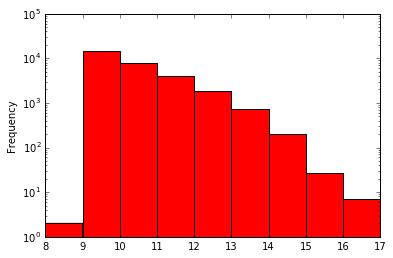

In [49]:
fig2, ax2 = plt.subplots()
ax2.set_yscale('log')

np.log2(salarios).plot(kind='hist', bins=faixas3, color=('red'), legend=False)

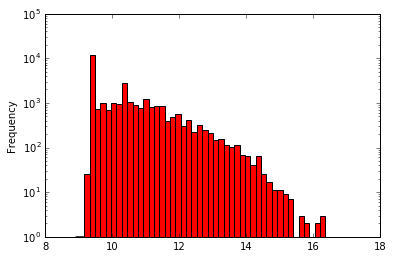

In [71]:
fig1, ax1 = plt.subplots()
ax1.set_yscale('log')

np.log2(salarios).plot(kind='hist', bins=faixas1, color=('red'), legend=False,x=None, y='renda na base log2',)

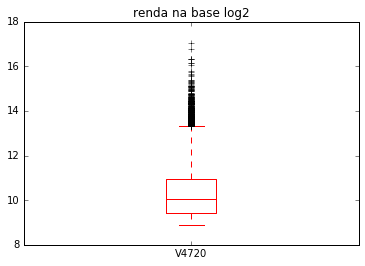

In [70]:
plot_box=np.log2(salarios).plot(kind='box', color=('red'),title='renda na base log2',x=None, y='renda',)



In [52]:
b.V8005.corr(b.V4720)

-0.024205095330013856

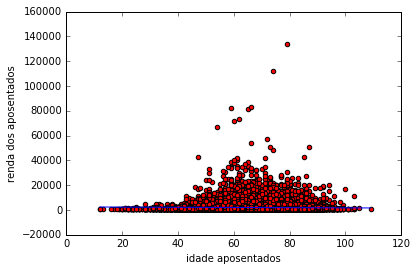

In [53]:
w= b.V8005.cov(b.V4720) / b.V8005.var()
z =b.V4720.mean() - w * b.V8005.mean()
plot1=b.plot.scatter(x='V8005', y='V4720',color='red')

import matplotlib.pyplot as plt
plt.plot((b.V8005.min(), b.V8005.max()), (z + w * b.V8005.min(), z + w * b.V8005.max()), color='blue')
plot1.set_xlabel('idade aposentados')
plot1.set_ylabel('renda dos aposentados')


In [57]:
Tabela_nova = b[(b.V6007=='Mestrado ou doutorado')]
Tabela_nova.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
13,538,2013,11,139,1,2,Feminino,28,9,1958,...,3.0,4766.0,7.0,7,1.0,1.0,1.0,1.0,4766.0,20150428
716,17809,2013,13,1183,3,2,Feminino,7,6,1948,...,2.0,6339.0,7.0,7,2.0,NaN,2.0,1.0,6339.0,20150428
718,17876,2013,13,1183,21,3,Masculino,27,7,1941,...,4.0,5625.0,7.0,7,1.0,2.0,2.0,1.0,5625.0,20150428
732,18053,2013,13,1221,13,1,Feminino,8,6,1955,...,3.0,1359.0,5.0,7,1.0,2.0,2.0,1.0,1359.0,20150428
736,18072,2013,13,1230,4,1,Feminino,5,6,1960,...,2.0,4425.0,7.0,7,2.0,NaN,NaN,2.0,4425.0,20150428


In [55]:
Tabela_nova.V8005.corr(Tabela_nova.V4720)

0.060691103358568692

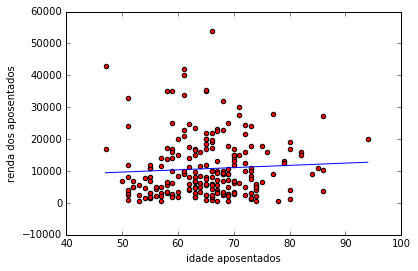

In [56]:
k= Tabela_nova.V8005.cov(b.V4720) / Tabela_nova.V8005.var()
l =Tabela_nova.V4720.mean() - k * Tabela_nova.V8005.mean()
plot2=Tabela_nova.plot.scatter(x='V8005', y='V4720',color='red')

import matplotlib.pyplot as plt
plt.plot((Tabela_nova.V8005.min(), Tabela_nova.V8005.max()), (l + k * Tabela_nova.V8005.min(), l + k * Tabela_nova.V8005.max()), color='blue')
plot2.set_xlabel('idade aposentados')
plot2.set_ylabel('renda dos aposentados')

Maior parte masculina 
grande maioria na area urbana
alguns pontos foras da curva com menos da idade de aposentadoria; 
70% dos aposentados possuem celular, na area rural pequena maioria não possui celular
Maior quantidade dos aposentados são brancos, seguido dos pardos, leve reflexo da quantidade na população, que demonstra existirem mais pardos a brancos
não existe coerrelação entre a idade dos aposentados e suas rendas, inclusive quando pegamos uma determinada faixa de graduação, como por exemplo aqueles que são doutores ou mestres, onde a correlaçao ficou num fator de 0.06, enquanto a correlção de renda com todos os aposentados ficou em -0.02
Boxplot da renda nos mostra que existe uma grande quantidade de outliers, alem de demonstrar que existe uma grande variação nas rendas, podemos perceber tambem no boxplot, que a diferença entre o menor valor e o limite é muito grande, ate mesmo quando estamos utiliando uma base log2
min         480.000000
25%         678.000000
50%        1050.000000
75%        2000.000000
max      133500.000000

# Como caracterizar os aposentados da população brasileira?
        Os aposentados do brasil, mesmo quadno vemos na legislação que eles precisam ter no minimo 65 anos (homem) ou 60 anos (mulher); podemos observar que existem alguns pequenos outlier de idade, que podem ser explicados pelo simples fato de terem sido aposentados por invalidez em muitos casos. Mesmo a pequena maioria da população, aproximadamente 51,5%, ser feminia a maior parte dos aposentados são homens, vivendo na area urbana. Mesmo com os pardos sendo a etnia que possui mais pessoas, seguida dos brancos, eles acabam invertedo na hora dos aposentados, onde a maior quantidade de aposentados são os brancos, seguido pelos pardos. Podemos odservar tambem uma grande diferença, não so na cultura, como no avaço da legislação no brasil, pois hoje, a regulamentação permite trabalho de menor como aprendiz a partir dos 14 anos, segundo site do tst (tribunal Superior de justiça, site :'http://www.tst.jus.br/noticias/-/asset_publisher/89Dk/content/regulamentacao-permite-trabalho-de-menor-como-aprendiz-a-partir-dos-14-anos'), enquanto a mais ou menos 57 anos atras pessoas com ate menos de 9 anos, aproximadamente 25% dos aposentados intrevistados, ja estavam trablhando, como vimos no grafico (Idade que começou a trabalhar), assim como os que tinham entre 10 e 14 anos que representam 45% dos hoje aposentados.
        Os aposentados, mesmo tendo nascido aproximadamente no ano de 1955, na epoca em que as televisões estavam começando a tomar todas as casas ao redor do mundo, e bem na epoca em que foram criados os primeiro pagers, não tiveram medo da tecnologia, mesmo ainda tendo alguns que não possuem, quase 70% possuem celular e podemos perceber que essa pequena maioria que não possui se concetra na area rural, onde uma pequena maioria dos moradores não possuem.
        Portanto, podemos dizer que o perfil dos aposentados brasileiros são: homens brancos que se adequaram a tecnologia e possuem celular, que vivem na area urbana e que trabalham desde muito pequenos, menos de 14 anos, onde 36% possuiam menos de 9 anos.
        Um fator que não teve uma correlação muito clara com os aposentados, foi o de renda, no periodo, valores muito descrepantes entre o menor e o maior, variando entre 480 a 133500, quando um boxplot foi plotado para tentar explicar esses dados, descobrimos que a media era de 1050 reais a o terceiro quartil estava batendo em 2000 reais, o que demosntra que essa pessoas que tinham uma grande renda, são apenas uns outliers. Quando tentei cria uma correlação entre a renda e idade dos aposentados foi descoberto que não existia nenhuma correlação, pois o valor de de -0,02, e ate mesmo quando tentei pegar uma determinada faixa de graduação,  a correlação não passou de o,o6, quandoforam escolhidos os mestres ou doutores, portanto podemos dizer que não relação entre a idade do aposentado e sua renda.

b.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

dados.EDUCACAO.cat.categories = ('Analfabeto', '1o. Grau', '2o. Grau', 'Graduacao', 'Pos-Graduacao')
~T.'codigo'.isnull() => para retirar nul do codigo
~ não
& and
| or